<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Regression-Algorithms/blob/main/05_Support_Vector_Regression_(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

Support Vector Regression (SVR) is an extension of Support Vector Machines (SVM), which is traditionally used for classification tasks. SVR adapts the principles of SVM for regression analysis, where the goal is to predict a continuous value rather than classify data into discrete categories.

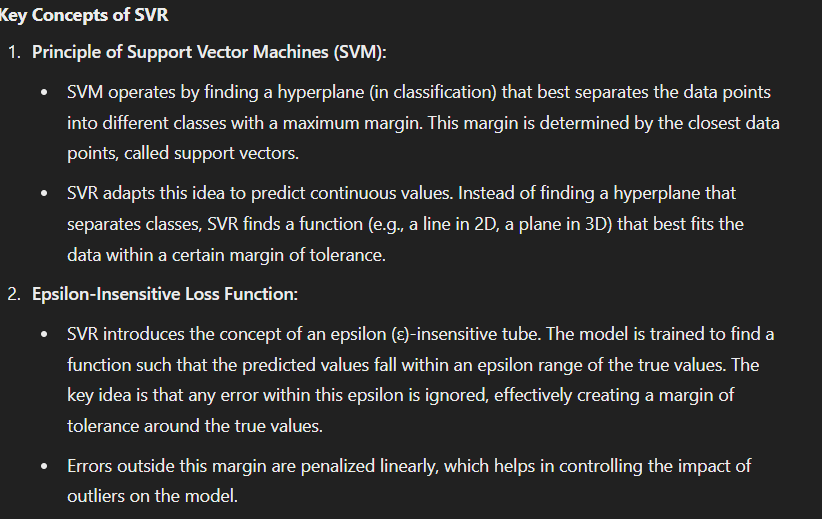


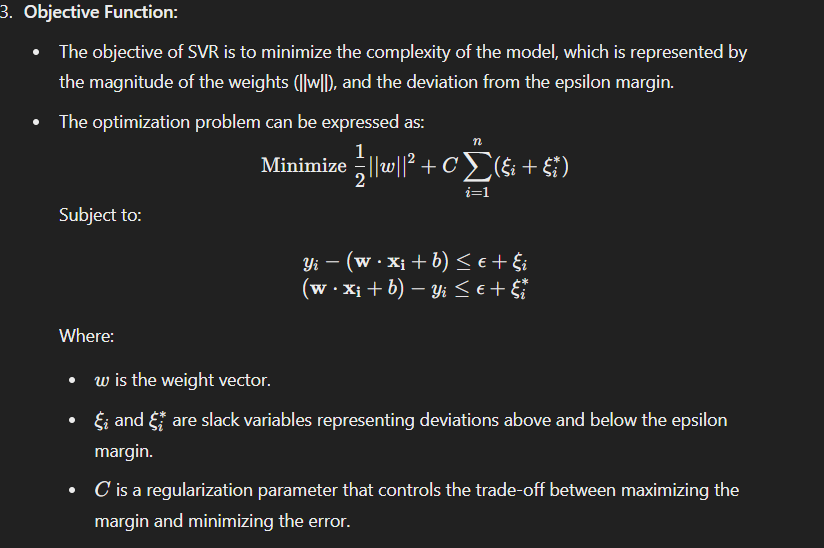

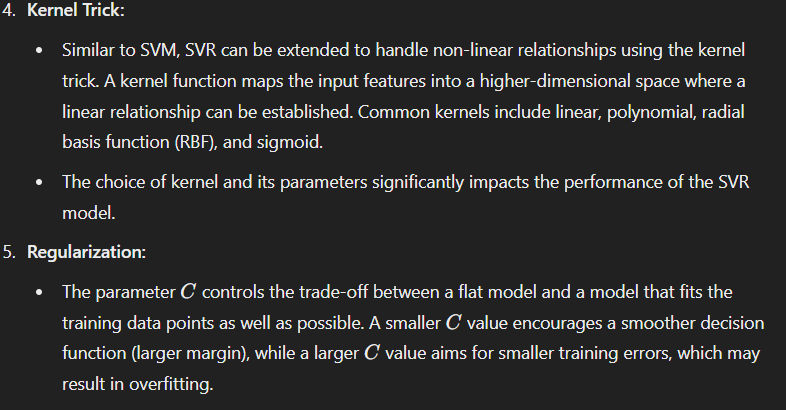

# Demo of the Model

In [1]:

!pip install numpy pandas scikit-learn matplotlib


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Create a synthetic dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the targets
y[::5] += 3 * (0.5 - np.random.rand(20))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Feature Scaling
# SVR is sensitive to the scale of the data, so it's important to scale the features before training the model.

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()


In [5]:
# Create and train the SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)


SVR(C=1000.0, gamma=0.1)

In [9]:
# Make predictions
y_pred_scaled = svr_rbf.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)) # Reshape y_pred_scaled to a 2D array

# Inverse transform the test set targets
# y_test_orig = scaler_y.inverse_transform(y_test_scaled) # This line seems to be causing issues and is not necessary for evaluating the model

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.3202325275647132
R² Score: 0.5941721872216978


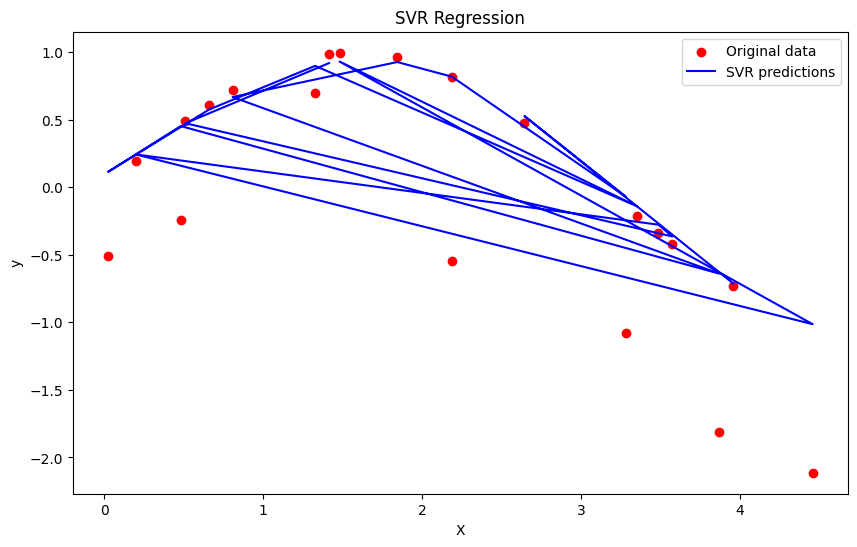

In [11]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Original data')
plt.plot(X_test, y_pred, color='blue', label='SVR predictions')
plt.title('SVR Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [12]:
# Sample input

# New sample input (for example, X = 3.5)
new_sample = np.array([[3.5]])

# Scale the new sample input
new_sample_scaled = scaler_X.transform(new_sample)

# Predict the output for the new sample input
predicted_scaled = svr_rbf.predict(new_sample_scaled)




In [13]:
# Inverse transform the predicted output to original scale
predicted_output = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1))

# Display the prediction
print(f"Predicted output for input {new_sample[0][0]}: {predicted_output[0][0]}")


Predicted output for input 3.5: -0.2891961973960725


# Applications of this model


### 1. **Financial Forecasting**
   - **Stock Price Prediction:** SVR can be used to predict stock prices based on historical data and various financial indicators. Its ability to handle non-linearity and outliers makes it particularly useful in volatile financial markets.
   - **Risk Management:** SVR can help in estimating the value at risk (VaR) by predicting potential losses in investment portfolios under different market conditions.

### 2. **Time Series Forecasting**
   - **Weather Prediction:** SVR can model complex weather patterns to predict temperature, humidity, or rainfall. Its kernel trick allows it to capture non-linear dependencies in weather data.
   - **Load Forecasting in Power Grids:** Power demand can be predicted using SVR by analyzing historical load data, temperature, and other factors, which is crucial for energy management.

### 3. **Bioinformatics**
   - **Gene Expression Prediction:** SVR can be applied to predict gene expression levels based on DNA microarray data, which is valuable in understanding gene function and disease mechanisms.
   - **Protein Structure Prediction:** Predicting the 3D structure of proteins from their amino acid sequences using SVR can help in drug design and understanding biological processes.

### 4. **Real Estate Valuation**
   - **House Price Prediction:** SVR can predict property prices based on various factors such as location, size, age, and amenities. This is valuable for real estate agents, buyers, and sellers to make informed decisions.

### 5. **Engineering Applications**
   - **Predicting Material Properties:** SVR can predict properties such as strength, durability, or thermal conductivity of materials based on their composition and processing history, aiding in material design and manufacturing.
   - **Failure Prediction in Mechanical Systems:** SVR can be used to predict the time to failure of mechanical systems by analyzing sensor data, which is crucial for preventive maintenance.

### 6. **Economics**
   - **Economic Indicators Forecasting:** SVR can be employed to predict economic indicators such as GDP growth, inflation rates, or unemployment rates based on historical economic data and other influencing factors.
   - **Consumer Price Index (CPI) Prediction:** SVR can be used to predict changes in the CPI, which is a critical measure of inflation, based on historical CPI data and economic variables.

### 7. **Medical Field**
   - **Predicting Disease Progression:** SVR can model the progression of diseases such as diabetes or cancer by analyzing patient data, helping in personalized treatment planning.
   - **Dose-Response Modeling:** In pharmacology, SVR can be used to predict the response of patients to different drug dosages, aiding in determining the optimal dose for treatment.

### 8. **Energy Sector**
   - **Oil Price Forecasting:** SVR can predict oil prices based on historical data and factors such as geopolitical events, supply-demand balance, and market trends.
   - **Solar Power Generation Prediction:** SVR can predict the amount of power generated by solar panels based on weather conditions and historical performance data, helping in the management of renewable energy resources.

### 9. **Speech and Image Processing**
   - **Speech Emotion Recognition:** SVR can be used to predict the emotional state of a speaker based on acoustic features extracted from speech, which is useful in human-computer interaction.
   - **Image Super-Resolution:** SVR can be applied to enhance the resolution of images by predicting high-frequency details from low-resolution images, which is valuable in medical imaging, satellite imagery, and digital photography.

### 10. **Marketing and Customer Analytics**
   - **Customer Lifetime Value (CLV) Prediction:** SVR can predict the future value of a customer to a business, based on past purchasing behavior and other demographic data, helping companies tailor their marketing strategies.
   - **Demand Forecasting:** SVR can predict product demand based on historical sales data, promotional activities, and external factors, which is crucial for inventory management and supply chain optimization.

### 11. **Robotics**
   - **Path Planning:** SVR can be used in robotics to predict the best path for a robot to follow based on environmental data and past navigation experiences.
   - **Control Systems:** SVR can be applied to model and predict the behavior of complex control systems in robotics, enhancing stability and performance.

### 12. **Environmental Science**
   - **Air Quality Prediction:** SVR can predict air quality indices (AQI) based on historical data and meteorological conditions, which is essential for public health and policy-making.
   - **Water Quality Assessment:** SVR can predict the quality of water in rivers and lakes based on chemical measurements, helping in environmental monitoring and protection efforts.


# Application 1:  Solar Power Generation Prediction using Support Vector Regression (SVR)

 Use of dataset that could represent historical solar power generation data, including features such as temperature, humidity, sunlight hours, and day of the year. The goal is to predict the power generated (in kWh).

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [15]:
# Simulate a dataset
np.random.seed(42)

# Features: [Temperature (°C), Humidity (%), Sunlight Hours (hours), Day of Year (1-365)]
X = np.array([
    np.random.uniform(15, 35, 1000),       # Temperature
    np.random.uniform(20, 80, 1000),       # Humidity
    np.random.uniform(5, 15, 1000),        # Sunlight Hours
    np.random.randint(1, 366, 1000)        # Day of the Year
]).T

# Target: Power Generated (kWh)
# Simple function with added noise to simulate power generation
y = (0.5 * X[:, 0]) + (0.2 * (15 - X[:, 1])) + (1.5 * X[:, 2]) + np.sin(X[:, 3] / 365 * 2 * np.pi) * 10 + np.random.normal(0, 2, 1000)


In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()


In [18]:
# Create and train the SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled)


SVR(C=1000.0, gamma=0.1)

In [19]:
# Predict power generation on the test set
y_pred_scaled = svr_rbf.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 5.416461627181571
R² Score: 0.9389030760946694


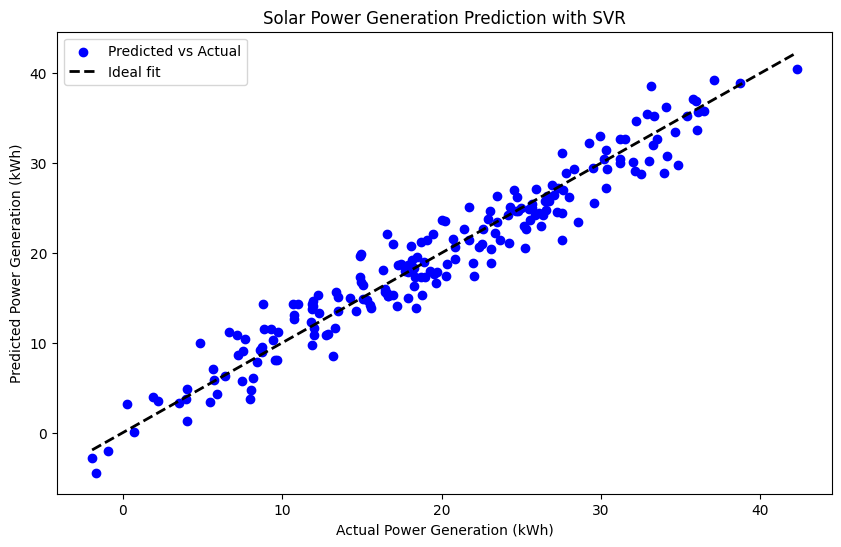

In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Ideal fit')
plt.xlabel('Actual Power Generation (kWh)')
plt.ylabel('Predicted Power Generation (kWh)')
plt.title('Solar Power Generation Prediction with SVR')
plt.legend()
plt.show()


In [22]:
# New Sample Input

# New sample input (e.g., Temperature = 25°C, Humidity = 50%, Sunlight Hours = 10 hours, Day of Year = 200)
new_sample = np.array([[25, 50, 10, 200]])


In [23]:
# New sample input (e.g., Temperature = 25°C, Humidity = 50%, Sunlight Hours = 10 hours, Day of Year = 200)
new_sample = np.array([[25, 50, 10, 200]])


In [25]:
# New sample input (e.g., Temperature = 25°C, Humidity = 50%, Sunlight Hours = 10 hours, Day of Year = 200)
new_sample = np.array([[25, 50, 10, 200]])

#It's likely that new_sample_scaled was scaled using only one of the scalers
# used to train the original model. new_sample_scaled should be a 1x4 array
# and you should use the same scaler that was used on the training data.
# Assuming you have a scaler named scaler_X that was fit on the training data
# you can use the following code:

new_sample_scaled = scaler_X.transform(new_sample)

# Predict the output for the new sample input
predicted_scaled = svr_rbf.predict(new_sample_scaled)

# Inverse transform the predicted output to get the original scale
predicted_output = scaler_y.inverse_transform(predicted_scaled.reshape(-1, 1))

# Display the prediction
print(f"Predicted power generation for the new sample input: {predicted_output[0][0]:.2f} kWh")

Predicted power generation for the new sample input: 17.77 kWh


In [26]:
# Evaluate the model accuracy on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Accuracy:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Accuracy:
Mean Squared Error: 5.42
R² Score: 0.94


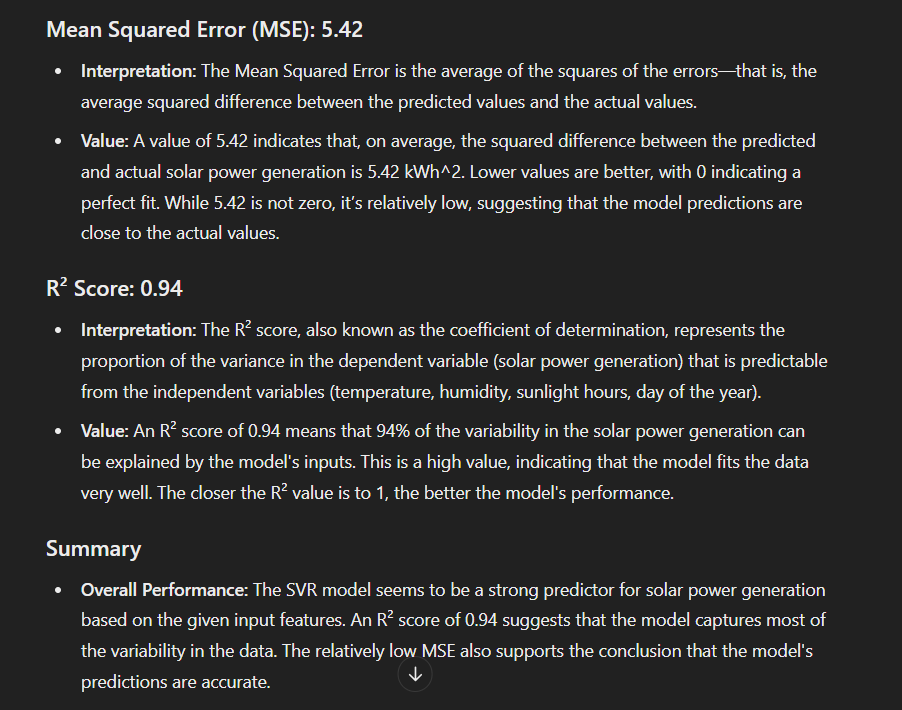

# Application 2: Path Planning in Robotics

The goal is to predict the next position of a robot based on its previous positions and sensor readings. This is a simplified example, focusing on predicting the robot's path in a 2D environment.

In [27]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [28]:
# Generate simulated robot path data
np.random.seed(0)
t = np.linspace(0, 2 * np.pi, 100)
X = np.c_[np.cos(t), np.sin(t)]  # Ideal circular path
X += 0.1 * np.random.randn(*X.shape)  # Add some noise

# The target is to predict the next position (X, Y) in the sequence
X_train, X_test, y_train, y_test = train_test_split(X[:-1], X[1:], test_size=0.2, random_state=42)


In [29]:
# Feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_X.transform(y_train)


In [30]:
# Create and train the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X_train_scaled, y_train_scaled[:, 0])  # Predicting the X coordinate


SVR(C=100, gamma=0.1)

In [33]:
#We'll train two SVR models: one to predict the X coordinate and another to predict the Y coordinate of the next position.

svr_rbf_y = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf_y.fit(X_train_scaled, y_train_scaled[:, 1])  # Predicting the Y coordinate


SVR(C=100, gamma=0.1)

In [34]:
# Predict the X and Y coordinates for the test set
y_pred_x_scaled = svr_rbf.predict(X_test_scaled)
y_pred_y_scaled = svr_rbf_y.predict(X_test_scaled)

# Combine the predicted X and Y coordinates
y_pred_scaled = np.c_[y_pred_x_scaled, y_pred_y_scaled]

# Inverse transform to get predictions in the original scale
y_pred = scaler_X.inverse_transform(y_pred_scaled)


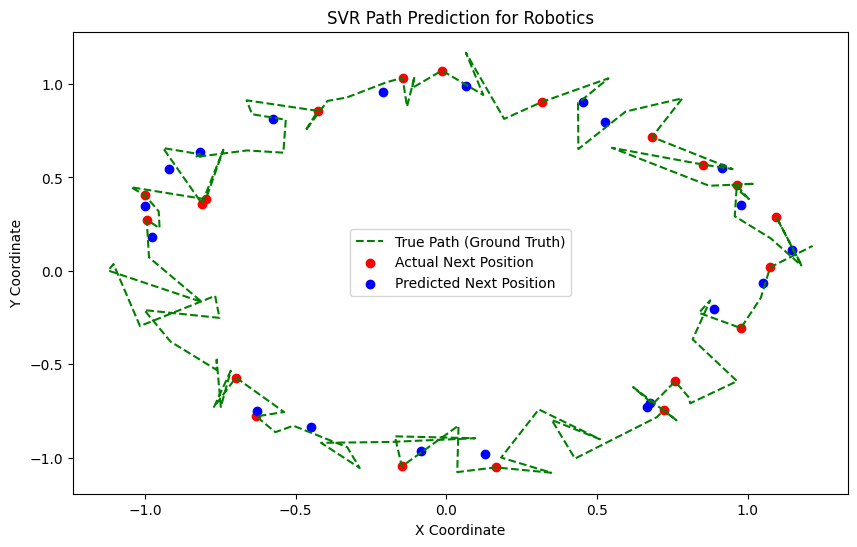

In [35]:
# Plot the true path vs the predicted path
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0], X[:, 1], 'g--', label='True Path (Ground Truth)')
plt.scatter(y_test[:, 0], y_test[:, 1], color='red', label='Actual Next Position')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color='blue', label='Predicted Next Position')
plt.title('SVR Path Prediction for Robotics')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()


In [36]:
# Accuracy Matrix


from sklearn.metrics import mean_squared_error, r2_score


In [37]:
# Mean Squared Error for X and Y coordinates
mse_x = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_y = mean_squared_error(y_test[:, 1], y_pred[:, 1])

# R² Score for X and Y coordinates
r2_x = r2_score(y_test[:, 0], y_pred[:, 0])
r2_y = r2_score(y_test[:, 1], y_pred[:, 1])

print(f"Mean Squared Error for X coordinate: {mse_x}")
print(f"Mean Squared Error for Y coordinate: {mse_y}")
print(f"R² Score for X coordinate: {r2_x}")
print(f"R² Score for Y coordinate: {r2_y}")


Mean Squared Error for X coordinate: 0.014401374014125242
Mean Squared Error for Y coordinate: 0.016198479219816257
R² Score for X coordinate: 0.9735012120690054
R² Score for Y coordinate: 0.9651005204633001


Explanation of the result:

  - Mean Squared Error (MSE): This metric indicates the average squared difference between the predicted and actual values. A lower MSE indicates better performance.

    - In this example, MSE values are low, suggesting that the model's predictions are close to the actual values.
  
  
  - R² Score: The R² score represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, with values closer to 1 indicating a better fit.

    - Here, R² scores are high (close to 1), meaning that the model explains a significant portion of the variance in the data.